# SC2001/CE2101/CZ2101 ALGORITHM DESIGN AND ANALYSIS

## Project 1: Integration of Mergesort & Insertion Sort

In Mergesort, when the sizes of subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. Therefore, in real use, we often combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. The idea is to set a small integer $S$ as a threshold for the size of subarrays. Once the size of a subarray in a recursive call of Mergesort is less than or equal to $S$, the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

(a) **Algorithm implementation**: Implement the above hybrid algorithm.

In [143]:
def insertionSort(n, m):
  for i in range(n+1, m):
    for j in range(i, n, -1):
      if L[j] < L[j-1]: L[j], L[j-1] = L[j-1], L[j]
      else: break

In [144]:
def merge(n, m):
  if m-n <= 0: return L
  mid = n + (m-n)//2
  a, b = n, mid+1
  # up to this is true
  while a <= mid and b <= m:
    if L[a] < L[b]:
      a += 1
    elif L[a] > L[b]: # TO DO: write one-liner code
      temp = L[b]
      for i in range(b, a, -1):
        L[i] = L[i-1]
      L[a] = temp
      a += 1
      b += 1
      mid += 1
    else: # L[a] == L[b]
      if a == mid and b == m: break
      a += 1
      temp = L[b]
      for i in range(b, a, -1): 
        L[i] = L[i-1]
      L[a] = temp
      a += 1
      b += 1
      mid += 1

def mergeSort(n, m):
  mid = n + (m-n)//2
  if m-n <= 0: return
  else: # m-n >= 1
    mergeSort(n, mid)
    mergeSort(mid+1, m)
  merge(n, m)

In [145]:
def switchSort(n, m): # TO DO: find the threshold S
  S=100 #fix S=100 first
  if m-n > S: mergeSort(n, m)
  else: insertionSort(n, m)

(b) **Generate input data**: Generate arrays of increasing sizes, in a range from 1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of $[1, …, x]$, where $x$ is the largest number you allow for your
datasets.

In [146]:
import random

def generate(N): #create arrays of varying sizes and random int values
  L_arr = random.sample(range(1,10**10), N)
  return L_arr

(c) Analyze time complexity: Run your program of the hybrid algorithm on the datasets generated in Step (b). Record the number of key comparisons performed in each case.

i. With the value of $S$ fixed, plot the number of key comparisons over different sizes of the input list $n$. Compare your empirical results with your theoretical analysis of the time complexity.

ii. With the input size $n$ fixed, plot the number of key comparisons over different values of $S$. Compare your empirical results with your theoretical analysis of the time complexity.

iii. Using different sizes of input datasets, study how to determine an optimal value of $S$ for the best performance of this hybrid algorithm.


We redefine the function `merge` and `mergeSort` to add counter `key_comparison`.

In [147]:
def merge(n, m):
  key_comparison = 0
  if m-n <= 0: return 0
  mid = n + (m-n)//2
  a, b = n, mid+1
  while a <= mid and b <= m:
    if L[a] < L[b]:
      a += 1
    elif L[a] > L[b]: # TO DO: write one-liner code
      temp = L[b]
      for i in range(b, a, -1):
        L[i] = L[i-1]
      L[a] = temp
      a += 1
      b += 1
      mid += 1
    else: # L[a] == L[b]
      if a == mid and b == m: break
      a += 1
      temp = L[b]
      for i in range(b, a, -1): 
        L[i] = L[i-1]
      L[a] = temp
      a += 1
      b += 1
      mid += 1
    key_comparison += 1
  return key_comparison

def mergeSort(n, m):
  mid = n + (m-n)//2
  if m-n <= 0: return 0
  else: # m-n >= 1
    key_comparison_l = mergeSort(n, mid)
    key_comparison_r = mergeSort(mid+1, m)
  key_comparison_merge = merge(n, m)
  keyC = key_comparison_l + key_comparison_r + key_comparison_merge
  return keyC

def insertionSort(n, m):
  key_comparison_is=0
  for i in range(n+1, m):
    for j in range(i, n, -1):
      if L[j] < L[j-1]:
        L[j], L[j-1] = L[j-1], L[j]
        key_comparison_is+=1
      else: break
  return key_comparison_is

def switchSort(n, m, S):
  keycomp_total=0
  if m-n > S: keycomp_total += mergeSort(n, m)
  else: keycomp_total += insertionSort(n, m)
  return keycomp_total

In [ ]:
#======#
# test #
#======#
import matplotlib.pyplot as plt
%matplotlib inline

kc=[]
N_arr=[]
S_arr=[]

i=j=2
for i in range(2,10**2): #n
  for j in range(2,10**2): #S
    keycomp_total=0
    N=i
    L=generate(N)
    S=j
    keycomp_total=switchSort(0,N-1,S)
    kc.append(keycomp_total)
    S_arr.append(S)
    N_arr.append(N)
print(len(kc))
print(len(N_arr))
#print(S_arr)
plt.scatter(N_arr[:], kc[:], c="blue")
#plt.scatter(S_arr[:], kc[:], c="red")
plt.show()

In [152]:
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0';
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')

def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
    Returns
      cost (scalar)    : cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i],w) + b           #(n,)(n,)=scalar
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/(2*m)
    return cost 

def inbounds(a,b,xlim,ylim):
    xlow,xhigh = xlim
    ylow,yhigh = ylim
    ax, ay = a
    bx, by = b
    if (ax > xlow and ax < xhigh) and (bx > xlow and bx < xhigh) \
        and (ay > ylow and ay < yhigh) and (by > ylow and by < yhigh):
        return True
    return False

def plt_contour_wgrad(x, y, hist, ax, w_range=[-100, 500, 5], b_range=[-500, 500, 5],
                contours = [0.1,50,1000,5000,10000,25000,50000],
                      resolution=5, w_final=200, b_final=100,step=10 ):
    b0,w0 = np.meshgrid(np.arange(*b_range),np.arange(*w_range))
    z=np.zeros_like(b0)
    for i in range(w0.shape[0]):
        for j in range(w0.shape[1]):
            z[i][j] = compute_cost(x, y, w0[i][j], b0[i][j] )

    CS = ax.contour(w0, b0, z, contours, linewidths=2,
                   colors=[dlblue, dlorange, dldarkred, dlmagenta, dlpurple])
    ax.clabel(CS, inline=1, fmt='%1.0f', fontsize=10)
    ax.set_xlabel("w");  ax.set_ylabel("b")
    ax.set_title('Contour plot of cost J(w,b), vs b,w with path of gradient descent')
    w = w_final; b=b_final
    ax.hlines(b, ax.get_xlim()[0],w, lw=2, color=dlpurple, ls='dotted')
    ax.vlines(w, ax.get_ylim()[0],b, lw=2, color=dlpurple, ls='dotted')

    base = hist[0]
    for point in hist[0::step]:
        edist = np.sqrt((base[0] - point[0])**2 + (base[1] - point[1])**2)
        if(edist > resolution or point==hist[-1]):
            if inbounds(point,base, ax.get_xlim(),ax.get_ylim()):
                plt.annotate('', xy=point, xytext=base,xycoords='data',
                         arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 3},
                         va='center', ha='center')
            base=point
    return

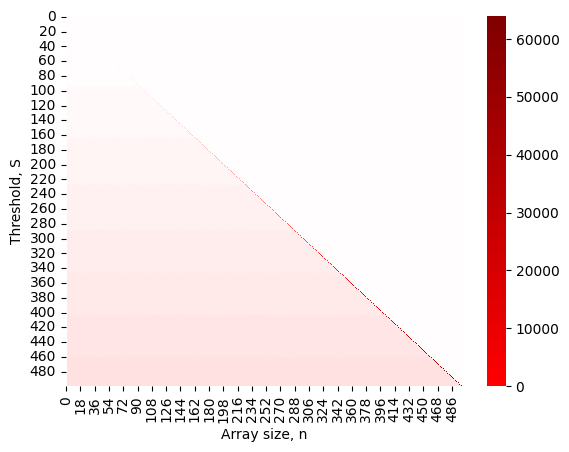

In [160]:
#combine S and n into a single matrix M[i][j]
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

kc=[]
N_arr=[]
S_arr=[]
for i in range(0,500):
    N_arr.append(i+1)
    S_arr.append(i+1)
M = np.zeros((500,500)) # 2D array stores KEYCOMP_TOTAL

for i in range(1,500):     # Row: Array size, n;  Col: Threshold, S #
    for j in range(1,500):
        keycomp_total=0
        N=i
        L=generate(N)
        S=j
        if (j>=i):
            M[i][j]=switchSort(0,N-1,N)
        keycomp_total=switchSort(0,N-1,S)
        M[i][j] = keycomp_total
        kc.append(keycomp_total)

#print(M)


from matplotlib import colors
import seaborn as sns

divnorm = colors.TwoSlopeNorm(vcenter=0.)
ax = sns.heatmap(M, linewidths=0, cmap='seismic', norm=divnorm)
plt.xlabel("Array size, n")
plt.ylabel("Threshold, S")
plt.show()

In [ ]:
#==========================#
# (C)(i) Vary array size n #
#==========================#
import matplotlib.pyplot as plt
%matplotlib inline

kc=[]
N_arr=[]

iterations=1000
while (iterations>0): ##iterate & collect data for key comparisons when varying n
  keycomp_total=0
  N = random.randint(30,10**2)
  L = generate(N)
  keycomp_total = switchSort(0,N-1,100)
  kc.append(keycomp_total)
  N_arr.append(N)
  iterations-=1

#TODO i need to fix the plot diagram :D #
"""fig, (ax1) = plt.subplots(1, 1, constrained_layout=True, figsize=(14,10))
ax1.plot(N_arr[:],kc[:])
ax1.set_title("(i) Varying size of arrays")
ax1.set_ylabel('no. of key comparisons')
ax1.set_xlabel('Array size, n')
plt.show()"""

plt.scatter(N_arr[:], kc[:], c="blue")
plt.show()
#print(kc)
#print()
#print(N_arr)


from matplotlib import colors
import seaborn as sns

divnorm = colors.TwoSlopeNorm(vcenter=0.)
ax = sns.heatmap([N_arr, S_arr, M], linewidths=0, cmap='seismic', norm=divnorm)
plt.xlabel("Array size, n")
plt.ylabel("Threshold, S")
plt.show()

In [ ]:
#=====================#
# (ii) vary integer S #
#=====================# 

kc2=[]
S_arr=[]

iterations=1000
while (iterations>0):
  keycomp_total=0
  N=10**3 #fixed
  L=generate(N)
  S=random.randint(5,500)
  keycomp_total=switchSort(0,N-1,S)
  kc2.append(keycomp_total)
  S_arr.append(S)
  iterations-=1

plt.scatter(S_arr[:], kc2[:], c="blue")

"""
fig, (ax1,ax2,ax3) = plt.subplots(1, 1, constrained_layout=True, figsize=(14,10))
ax2.plot(S_arr[:],kc[:])
ax2.set_title("(ii) Varying value of S, n")
ax2.set_ylabel('no. of key comparisons')
ax2.set_xlabel('integer S')"""
plt.show()

In [ ]:
from pylab import*
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,M, rstride=1, cstride=1, cmap='hot')
show()

(d) Compare with original Mergesort: Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of $S$ obtained in (c) for this task.

Now we have the optimal value of $S$ based on our work in (c). We want to redefine the function 'switchSort'.

In [ ]:
S = 0 # TO DO: find the threshold value S

def switchSort(n, m): # TO DO: find the threshold S
  if m-n > S: mergeSort(n, m)
  else: insertionSort(n, m)

In [ ]:
import random
import time

L = random.sample(range(-10**10, 10**10), 10**7)

st = time.process_time()
mergeSort(0, 10**7-1)
et = time.process_time()

print(et-st)

In [ ]:
L = [2, 3, 4, 1, 6, 7, 5, 8]

print(mergeSort(0, 7), L)